# Exploratary data analysis 

In [17]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbs
import geopandas as gpd
import folium 

In [18]:
from pyspark.sql import SparkSession

# Create a spark session with increased memory allocation
spark = (
    SparkSession.builder.appName("ADS Project1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "8g")  # Set the driver memory to 8GB
    .config("spark.executor.memory", "8g")  # Set the executor memory to 8GB
    .getOrCreate()
)

In [19]:
spark.conf.set("spark.sql.parquet.compression.codec","gzip")

In [20]:
# Load the data
df = spark.read.parquet("../data/curated/tlc_data/first_cleaned.parquet/")

## Summary Statistics 

In [21]:
# Drop rows with any missing values
clean_df = df.dropna()

# Check the number of remaining rows
remaining_rows = clean_df.count()
total_rows = df.count()

print(f"Remaining rows after dropping missing values: {remaining_rows} out of {total_rows}")
# print percentage of rows remaining
print(f"Percentage of rows remaining: {remaining_rows/total_rows*100:.2f}%")


Remaining rows after dropping missing values: 22215110 out of 22550483
Percentage of rows remaining: 98.51%


In [22]:
# summary statistics
clean_df.summary().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+-------------+-------------------+------------------+------------------+-------------------+------------------+------------------+---------------------+------------------+--------------------+---------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|      DOLocationID|     PULocationID|       pickup_hour|      dropoff_hour|          VendorID|   passenger_count|     trip_distance|     trip_duration|        RatecodeID|    PUBorough|    DOBorough|       payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|ehail_fee| hourly_trip_count|  daily_trip_count| 

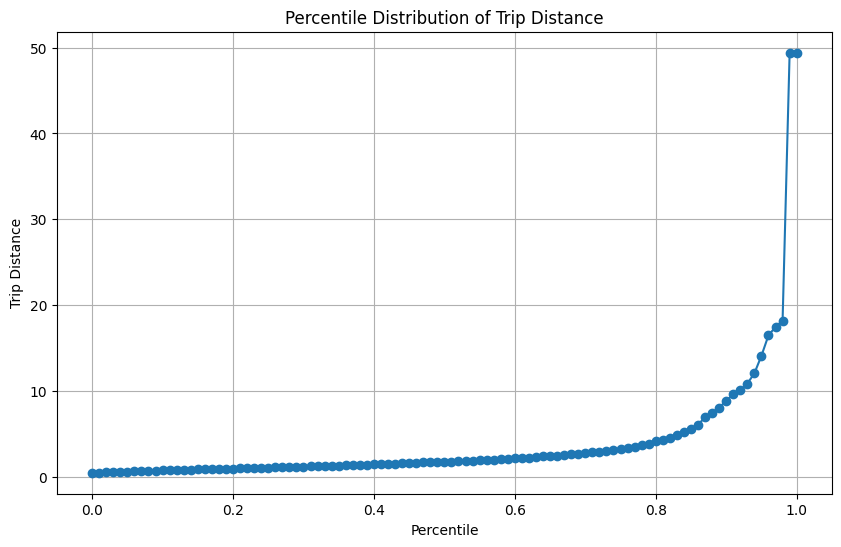

In [23]:
# Generate percentiles
percentiles = np.arange(0, 1.01, 0.01).tolist()  # Convert NumPy array to list

# Calculate approximate quantiles for trip_distance
percentile_trip_distance = clean_df.approxQuantile("trip_distance", percentiles, 0.01)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_trip_distance, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Trip Distance')
plt.title('Percentile Distribution of Trip Distance')
plt.grid(True)
plt.show()


## Distribution Analysis 

## Categorical Data Analysis

## Correlation Analysis 

## Bivariate Analysis